In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
imdb_dir = "C:/Users/Windows10/Desktop/data/aclImdb/"

train_pos = os.path.join(imdb_dir, 'train/pos/')
train_neg = os.path.join(imdb_dir, 'train/neg/')

test_pos = os.path.join(imdb_dir, 'test/pos/')
test_neg = os.path.join(imdb_dir, 'test/neg/')

data_path = [train_pos, train_neg, test_pos, test_neg]

In [3]:
from glob import glob

def make_dataframe(path = imdb_dir, data_path = data_path):
    pos = 1
    neg = 0
    label = []
    texts = []
    path_ = []

    for files in data_path:
        if files.find('pos') != -1:
            for text in glob(os.path.join(files, '*')):
                f = open(text, encoding = 'utf-8')
                temp = f.read()
                texts.append(temp)
                f.close()
                label.append(pos)
                path_.append(text)
        else:
            for text in glob(os.path.join(files, '*')):
                f = open(text, encoding= 'utf-8')
                temp = f.read()
                texts.append(temp)
                f.close()
                label.append(neg)
                path_.append(text)
    
    return label, texts, path_

label, texts, path_ = make_dataframe()

In [4]:
df = pd.DataFrame({'texts' : texts, 'labels' : label, 'paths': path_})

In [5]:
df['paths'][1]

'C:/Users/Windows10/Desktop/data/aclImdb/train/pos\\10000_8.txt'

In [6]:
paths = df.pop('paths')

In [7]:
df

,texts,labels
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1
...,...,...
49995,I occasionally let my kids watch this garbage ...,0
49996,When all we have anymore is pretty much realit...,0
49997,The basic genre is a thriller intercut with an...,0
49998,Four things intrigued me as to this film - fir...,0


In [8]:
df_shuffle = df.iloc[np.random.permutation(df.index)].reset_index(drop = True)

In [9]:
df_shuffle

,texts,labels
0,I was quite impressed with this movie as a chi...,0
1,Steven Seagal....how could you be a part of su...,0
2,"My one line summary should explain it all, but...",0
3,Arg. The shuffling dinosaurs are back to take ...,0
4,i know technically this isn't the greatest TV ...,1
...,...,...
49995,A pretty memorable movie of the animals-killin...,1
49996,I can't disagree with a previous comment that ...,1
49997,John Candy. Need we say more? He is the main r...,0
49998,Malcolm McDowell diagnoses Megan Gallagher's d...,1


In [10]:
import re

changed_texts = []
for text in df_shuffle['texts']:
    changed_texts.append(re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', ' ', text))


In [11]:
df_shuffle['changed_text'] = changed_texts

In [12]:
df_shuffle

,texts,labels,changed_text
0,I was quite impressed with this movie as a chi...,0,I was quite impressed with this movie as a chi...
1,Steven Seagal....how could you be a part of su...,0,Steven Seagal how could you be a part of su...
2,"My one line summary should explain it all, but...",0,My one line summary should explain it all but...
3,Arg. The shuffling dinosaurs are back to take ...,0,Arg The shuffling dinosaurs are back to take ...
4,i know technically this isn't the greatest TV ...,1,i know technically this isn t the greatest TV ...
...,...,...,...
49995,A pretty memorable movie of the animals-killin...,1,A pretty memorable movie of the animals killin...
49996,I can't disagree with a previous comment that ...,1,I can t disagree with a previous comment that ...
49997,John Candy. Need we say more? He is the main r...,0,John Candy Need we say more He is the main r...
49998,Malcolm McDowell diagnoses Megan Gallagher's d...,1,Malcolm McDowell diagnoses Megan Gallagher s d...


In [13]:
df_shuffle = df_shuffle.drop('texts', axis = 1)

df_shuffle.columns = ['labels', 'texts']
df_shuffle = df_shuffle[['texts', 'labels']]

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
t = Tokenizer(num_words= 20000)
t.fit_on_texts(df_shuffle['texts'])
seq = t.texts_to_sequences(df_shuffle['texts'])

In [16]:
df_com = df_shuffle.copy()
df_com['sequence'] = seq
print(df_com)

                                                   texts  labels  \
0      I was quite impressed with this movie as a chi...       0   
1      Steven Seagal    how could you be a part of su...       0   
2      My one line summary should explain it all  but...       0   
3      Arg  The shuffling dinosaurs are back to take ...       0   
4      i know technically this isn t the greatest TV ...       1   
...                                                  ...     ...   
49995  A pretty memorable movie of the animals killin...       1   
49996  I can t disagree with a previous comment that ...       1   
49997  John Candy  Need we say more  He is the main r...       0   
49998  Malcolm McDowell diagnoses Megan Gallagher s d...       1   
49999  This series adds new information and backgroun...       1   

                                                sequence  
0      [10, 14, 183, 1504, 18, 11, 16, 15, 3, 504, 4,...  
1      [2092, 2224, 86, 97, 21, 30, 3, 176, 4, 140, 3...  
2     

In [17]:
train_split = int(len(df_com) * 0.8)

train_data = df_com.iloc[:train_split, :]
test_data = df_com.iloc[train_split:, :]

In [18]:
train_data

,texts,labels,sequence
0,I was quite impressed with this movie as a chi...,0,"[10, 14, 183, 1504, 18, 11, 16, 15, 3, 504, 4,..."
1,Steven Seagal how could you be a part of su...,0,"[2092, 2224, 86, 97, 21, 30, 3, 176, 4, 140, 3..."
2,My one line summary should explain it all but...,0,"[59, 29, 348, 2603, 143, 1252, 8, 31, 19, 10, ..."
3,Arg The shuffling dinosaurs are back to take ...,0,"[1, 19087, 3877, 26, 145, 5, 189, 161, 4372, 4..."
4,i know technically this isn t the greatest TV ...,1,"[10, 120, 2661, 11, 214, 22, 1, 808, 239, 117,..."
...,...,...,...
39995,The worst movie I have seen in quite a while ...,0,"[1, 249, 16, 10, 28, 109, 9, 183, 3, 137, 219,..."
39996,This is a thoroughly enjoyable well acted fil...,1,"[11, 6, 3, 1646, 729, 71, 877, 20, 8, 6, 155, ..."
39997,Nicely done and along with New voyages it s...,1,"[1768, 221, 2, 343, 18, 170, 8, 13, 3, 81, 105..."
39998,Quentin Crisp once stated that when things are...,0,"[5758, 5258, 282, 3527, 12, 52, 181, 26, 605, ..."


In [19]:
test_data

,texts,labels,sequence
40000,I get the impression that I was watching a dif...,0,"[10, 76, 1, 1379, 12, 10, 14, 150, 3, 280, 16,..."
40001,My paraphrase above of the slogan on the back ...,0,"[59, 11398, 726, 4, 1, 23, 1, 145, 4, 1, 263, ..."
40002,What an inspiring movie I laughed cried and ...,1,"[48, 35, 3446, 16, 10, 1440, 3607, 2, 439, 111..."
40003,This was a horrible film I gave it 2 Points ...,0,"[11, 14, 3, 492, 20, 10, 514, 8, 231, 807, 29,..."
40004,That 70s Show is definitely the funniest sh...,1,"[12, 1830, 117, 6, 410, 1, 1532, 117, 3740, 23..."
...,...,...,...
49995,A pretty memorable movie of the animals killin...,1,"[3, 184, 891, 16, 4, 1, 1579, 847, 80, 2394, 3..."
49996,I can t disagree with a previous comment that ...,1,"[10, 51, 22, 3017, 18, 3, 928, 919, 12, 1799, ..."
49997,John Candy Need we say more He is the main r...,0,"[311, 1965, 364, 70, 133, 53, 25, 6, 1, 283, 2..."
49998,Malcolm McDowell diagnoses Megan Gallagher s d...,1,"[7684, 8724, 10094, 18311, 13, 542, 2, 55, 15,..."


In [20]:
train_pad = train_data['sequence'].values
test_pad = test_data['sequence'].values

In [21]:
train_pad_data = pad_sequences(train_pad, maxlen = 500)
test_pad_data = pad_sequences(test_pad, maxlen = 500)

In [22]:
x_train = train_pad_data
x_test = test_pad_data
y_train = train_data['labels'].values
y_test = test_data['labels'].values

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

In [24]:
model = Sequential([
    Embedding(len(t.word_index) + 1, 64, input_shape = (None,)),
    GlobalAveragePooling1D(),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'relu')
])

In [25]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(monitor= 'val_loss', mode = 'min', patience= 5)

In [27]:
history = model.fit(x_train, y_train, epochs = 20, validation_split = 0.2, callbacks= [es], shuffle = True)

Epoch 1/20
1000/1000 [==============================] - 41s 40ms/step - loss: 0.4870 - acc: 0.7994 - val_loss: 0.3793 - val_acc: 0.8708
Epoch 2/20
1000/1000 [==============================] - 41s 41ms/step - loss: 0.3436 - acc: 0.8978 - val_loss: 0.3408 - val_acc: 0.8947
Epoch 3/20
1000/1000 [==============================] - 41s 41ms/step - loss: 0.3254 - acc: 0.9116 - val_loss: 0.3573 - val_acc: 0.9034
Epoch 4/20
1000/1000 [==============================] - 41s 41ms/step - loss: 0.3234 - acc: 0.9193 - val_loss: 0.3623 - val_acc: 0.9039
Epoch 5/20
1000/1000 [==============================] - 42s 42ms/step - loss: 0.3089 - acc: 0.9234 - val_loss: 0.4278 - val_acc: 0.9040
Epoch 6/20
1000/1000 [==============================] - 40s 40ms/step - loss: 0.3093 - acc: 0.9309 - val_loss: 0.4280 - val_acc: 0.8744
Epoch 7/20
1000/1000 [==============================] - 40s 40ms/step - loss: 0.3082 - acc: 0.9347 - val_loss: 0.4842 - val_acc: 0.8955


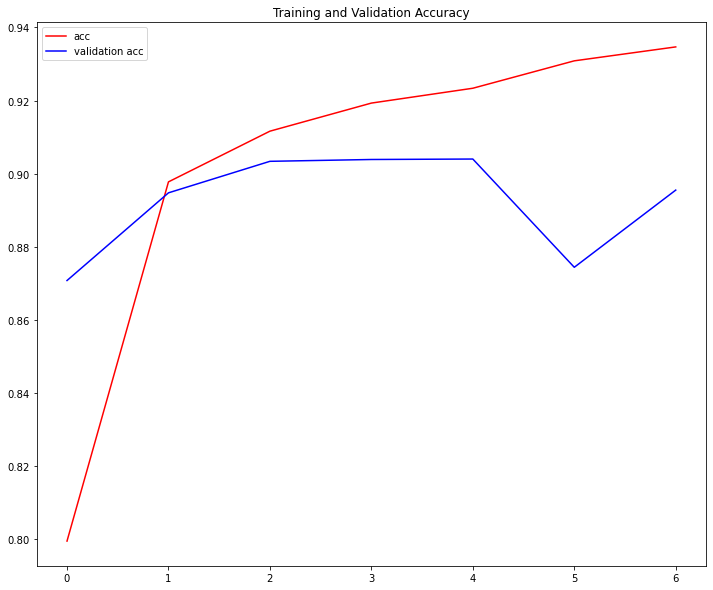

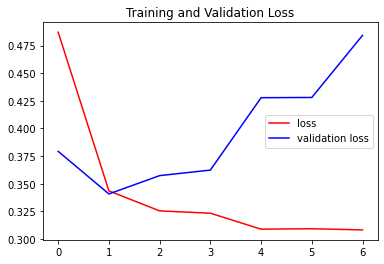

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(0, len(acc))

plt.figure(figsize = (12, 10))
plt.plot(epoch, acc, 'r-', label = 'acc')
plt.plot(epoch, val_acc, 'b-', label = 'validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epoch, loss, 'r-', label = 'loss')
plt.plot(epoch, val_loss, 'b-', label = 'validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()